<a href="https://colab.research.google.com/github/bindukovvada/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Bindu_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Importing the libraries


In [170]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the Dataset

In [204]:
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

#Exploratory Data Analysis

In [205]:
#Copying the dataset
data = df.copy()

In [206]:
#Showing first 5 rows
data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [187]:
data['Vehicle_Age']

0         > 2 Years
1          1-2 Year
2         > 2 Years
3          < 1 Year
4          < 1 Year
            ...    
381104     1-2 Year
381105     < 1 Year
381106     < 1 Year
381107    > 2 Years
381108     1-2 Year
Name: Vehicle_Age, Length: 381109, dtype: object

In [133]:
#Showing Last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [134]:
#Finding the size of the dataset
data.shape

(381109, 12)

In [135]:
#Check datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [177]:
data.isnull().sum()

Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Response                0
dtype: int64

##Dataset has 381109 rows and 12 columns. It has no missing values.

In [137]:
#Viewing all the columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [138]:
#Finding Duplicate values
len(data[data.duplicated()])

0

##No Duplicate Values found

#Descriptive Statistics

In [139]:
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


#Data Visualisation

In [140]:
#Storing target column into a variable 
Dependent_variable = data['Response']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


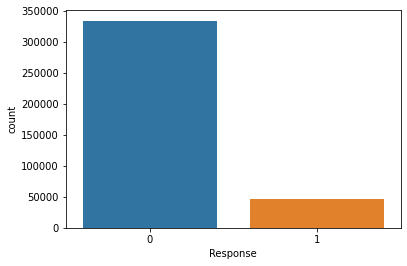

In [141]:
#Plot the count of the target variable
sns.countplot(data['Response'], data=data)

##We can see that data is highly unbalanced, indicating that only few people are interested in vehicle insurance

#Analyzing responses based on gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


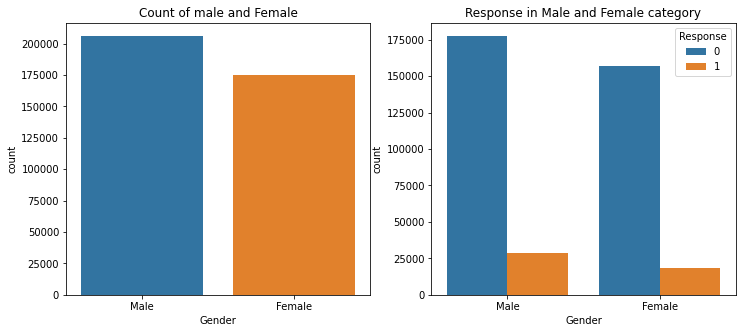

In [188]:
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'])
plt.title('Count of male and Female')
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue= data['Response'])
plt.title('Response in Male and Female category')
plt.show()

*   Gender variable is almost equally distributed
*   We can see that males are more likely to purchase vehicle insurance.



#Age Vs Response

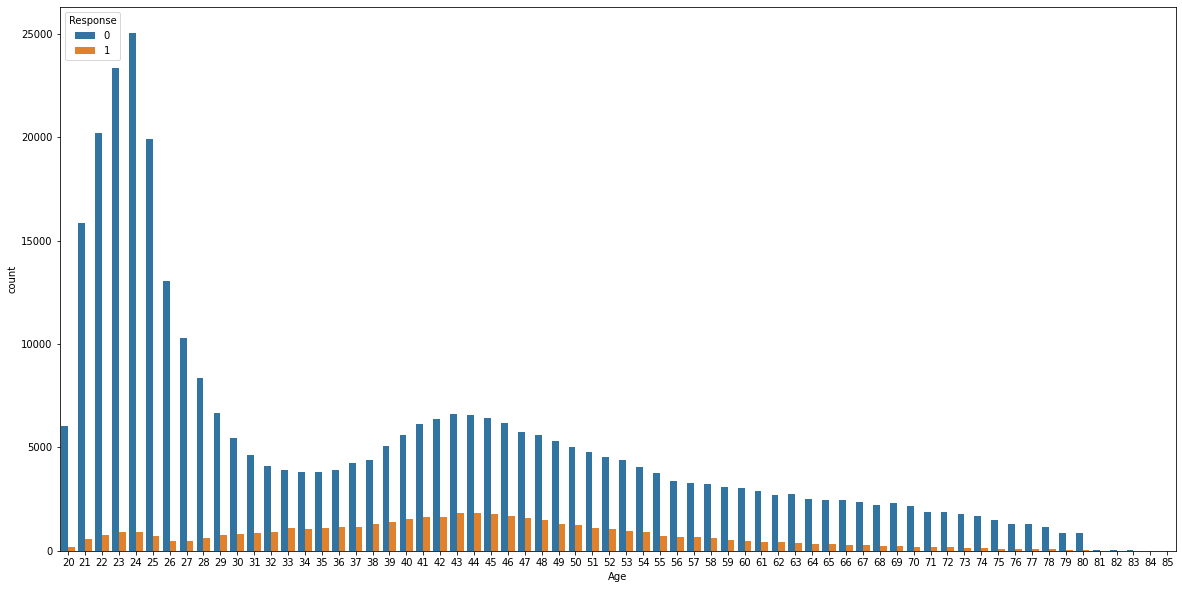

In [143]:
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


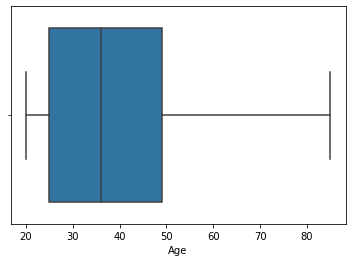

In [144]:
sns.boxplot(data['Age'])

*  We can see that Ages below 30 are not more interested in purchasing vehicle insurance may be because lack of experience and maturity levels.
*   People who are above 30-60 are more likely to be interested.
*   From boxplot we can see that there are no outliers in the data.

##Driving License Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


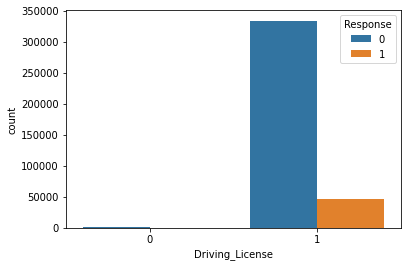

In [145]:
sns.countplot(data['Driving_License'], hue=data['Response'])

*   Customers who are interested in Vehicle insurance are almost having the driving license

#Previously Insured Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


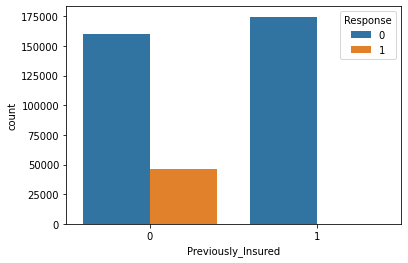

In [146]:
sns.countplot(data['Previously_Insured'], hue=data['Response'], data=data)

*   People who are not previously insured are most likely to be interested

#Vehicle age Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


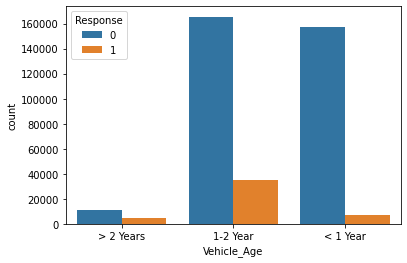

In [147]:
sns.countplot(data['Vehicle_Age'], hue= data['Response'], data=data)

Customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

#Region code Vs Response

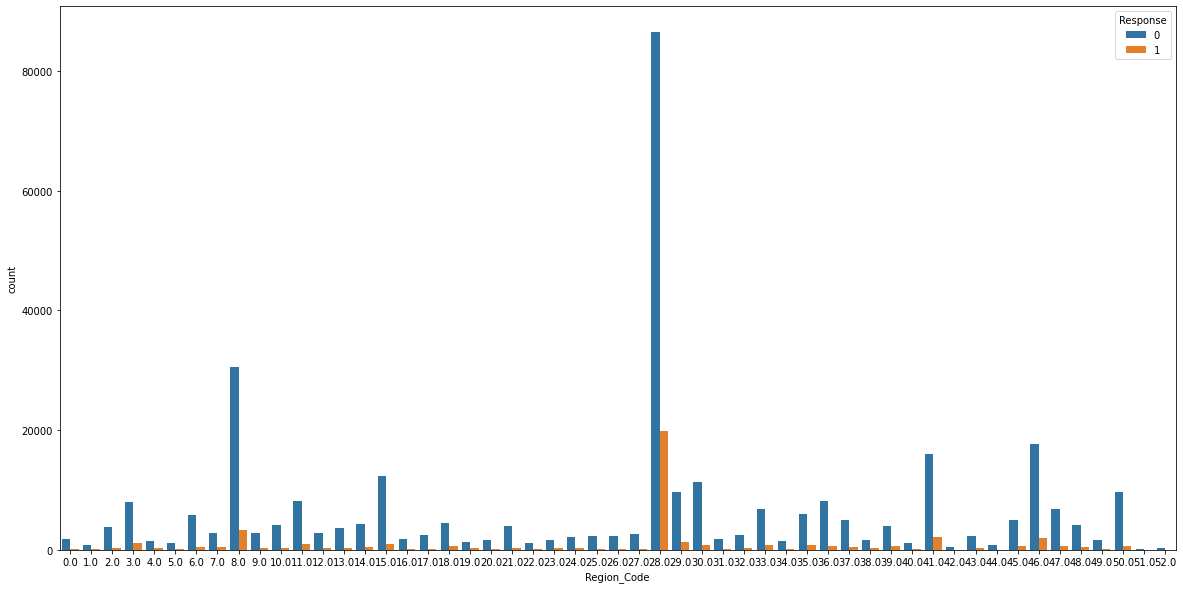

In [148]:
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=data)

*   Region Code - 0.28 has more customers

#Let's see the distribution of Annual Premium variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


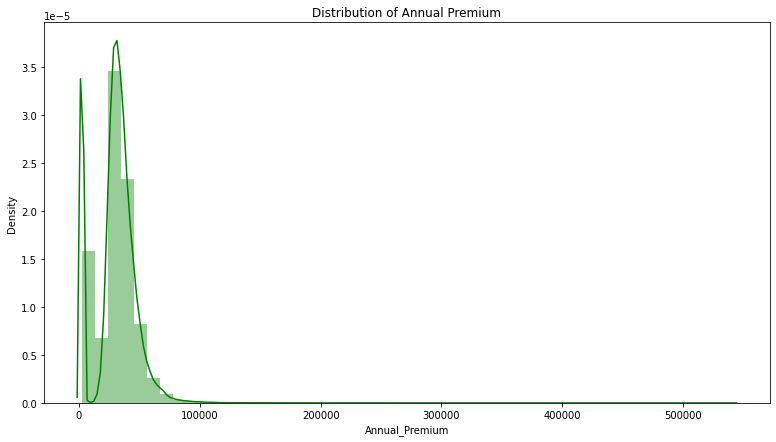

In [149]:
plt.figure(figsize=(13,7))
sns.distplot(data['Annual_Premium'],color='green')
plt.title('Distribution of Annual Premium')
plt.show()

*   From this plot we can see that the distribution of Annual premium is right skewed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


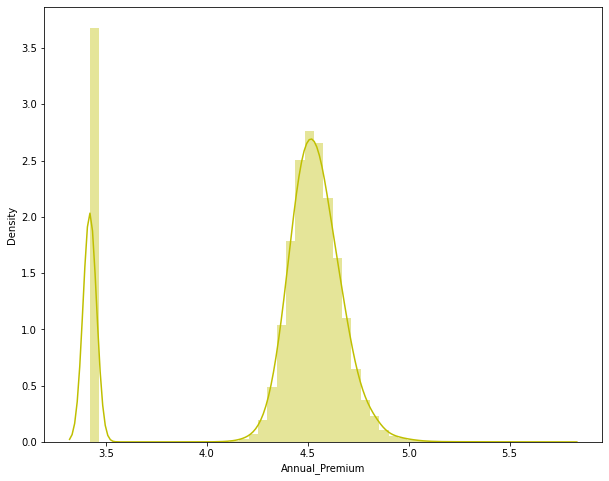

In [82]:
plt.figure(figsize = (10,8))
sns.distplot(np.log10(data['Annual_Premium']),color = 'y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


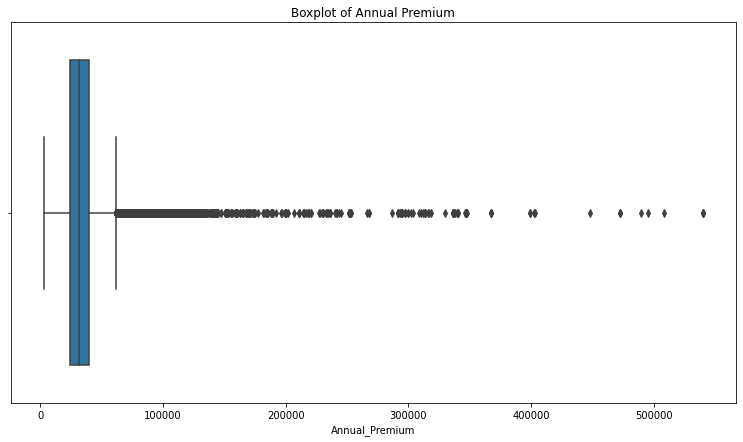

In [83]:
plt.figure(figsize=(13,7))
sns.boxplot(data['Annual_Premium'])
plt.title('Boxplot of Annual Premium')
plt.show()

We observe that there are lot of outliers in this variable

#Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

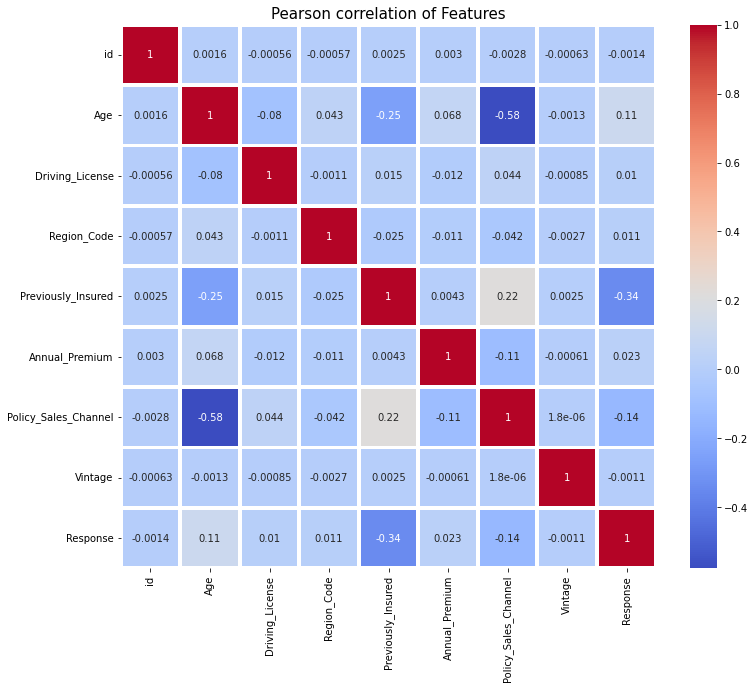

In [84]:
plt.figure(figsize = (12,10))
correlation = data.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Vintage is not much correlated with target variable, so we can drop least correlated variable.

#Prepare Data

Label Encoding

In [207]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [151]:
#Data after Encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [208]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [88]:
#data['Vehicle_Age']

In [153]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


No Duplicates found in this dataset.

##Seperating Dependent and Independent Variables

In [209]:
independent = data.drop(['Response'], axis=1) #Contain all independent variables
dependent = data['Response'] #Contain Dependent variable

In [210]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [211]:
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 1.05091307e+03, 4.76694479e+03, 3.93066928e+01,
        4.25827356e+01, 5.02033540e+04, 4.17348459e+03, 5.47422454e+04,
        1.94317587e+02, 7.51301151e+03, 4.20468707e-01]),
 array([3.98327606e-001, 3.18074235e-230, 0.00000000e+000, 3.62583444e-010,
        6.78391651e-011, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.72231514e-044, 0.00000000e+000, 5.16703652e-001]))

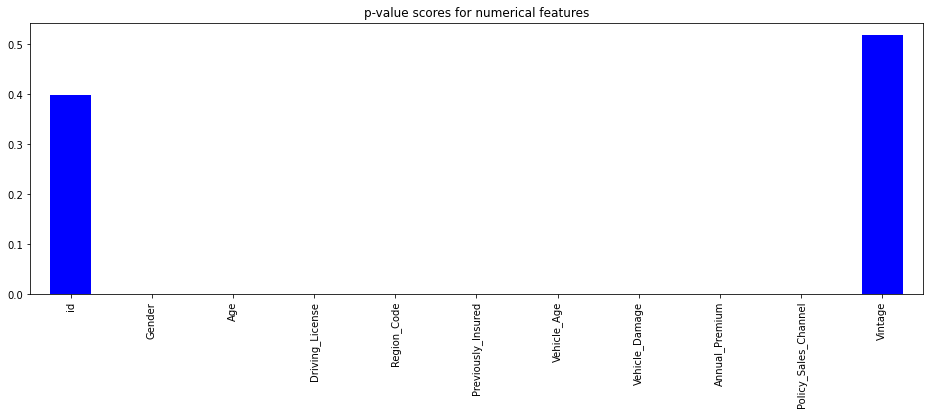

In [212]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()


We can drop Id and Vintage columns.

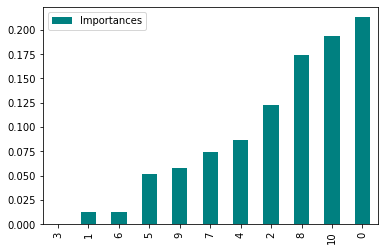

In [201]:
#Checking Feature importance by using RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
# Create the random forest with hyperparameters
model= RandomForestClassifier(n_estimators=340)
# Fit the mmodel
model.fit(independent,dependent)
# get the importance of thr resulting features
importances= model.feature_importances_
# Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(independent).columns, "Importances": importances})
final_df.set_index('Importances')
# Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances')
# Plot the feature importances in bars
final_df.plot.bar(color='teal')

*   We can see that Driving License and Gender has less importance, So we can drop these columns.

*   So after doing F_Classifier and RandomForestClassifier we can know that id,vintage,Driving_License,Gender are less important. So we can drop those columns.

In [213]:
data.drop(['id','Gender','Vintage','Driving_License'],axis=1,inplace=True)

#Handling Imbalanced data

In [214]:
# Class count
class_count_0, class_count_1 = data['Response'].value_counts()

# Separate class
class_0 = data[data['Response'] == 0]
class_1 = data[data['Response'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (334399, 8)
class 1: (46710, 8)


In [215]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [216]:
test_over['Response'].value_counts()

1    334399
0    334399
Name: Response, dtype: int64

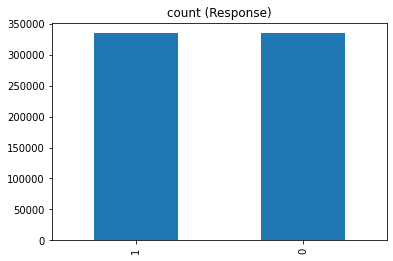

In [217]:
test_over['Response'].value_counts().plot(kind='bar', title='count (Response)')

#Split Train & Test data

In [219]:
#Splitting the data into train and test data

X = data.drop(['Response'], axis=1) #Contain all independent variables
y = data['Response'] 

In [220]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(266776, 7) (114333, 7) (266776,) (114333,)


In [221]:
ytrain = ytrain.values.reshape(-1,1)

In [222]:
ytest = ytest.values.reshape(-1,1)

In [223]:
ytrain.shape

(266776, 1)

In [224]:
ytest.shape

(114333, 1)

In [225]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [226]:
#Defining all these models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegresseer:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [227]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(Xtrain,ytrain)
      end = time.time()
      y_train_pred=curr_model.predict(Xtrain)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(ytrain,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(ytrain,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(ytrain,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(ytrain,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(ytrain,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [228]:
results = pd.DataFrame(model_data)
results

,Name,Train_Time,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,LinearClassifier:,0.438980,0.831885,0.829769,0.214616,0.213302,0.140996,0.141783,0.170185,0.170340,0.534561,0.534135
1,LogisticRegresseer:,1.471540,0.877733,0.876737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.499995
2,GNB:,0.122471,0.638337,0.637576,0.249716,0.250997,0.976761,0.978002,0.397745,0.399472,0.783978,0.783860
3,BNB:,0.096274,0.774028,0.771081,0.269596,0.266406,0.496229,0.488859,0.349378,0.344872,0.654477,0.649808
4,KNeighborsClassifier:,0.647810,0.895860,0.856122,0.640516,0.344048,0.337912,0.184573,0.442420,0.240255,0.655747,0.567551
5,DecisionTreeClassifier:,1.351183,0.985966,0.830784,0.988132,0.304545,0.895978,0.290519,0.939801,0.297367,0.947239,0.598627
6,RandomForestClassifier,34.638593,0.985910,0.847691,0.976992,0.328974,0.906095,0.226724,0.940209,0.268442,0.951561,0.580856
7,GradientBoostingClassifier:,30.846231,0.877740,0.876737,0.625000,0.000000,0.000153,0.000000,0.000307,0.000000,0.500070,0.499995
8,XGBRFClassifier:,8.934512,0.877733,0.876746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
9,AdaBoostClassifier:,10.086281,0.877733,0.876737,0.500000,0.000000,0.000031,0.000000,0.000061,0.000000,0.500013,0.499995


*   From the above DataFrame, we can say that the top models are Random Forest Classifier and Decision Tree Classifier.


#Let's consider Random Forest Classifier as the top model and perform Feature selection and Hyper parameter tuning to get more accuracy

In [229]:
#Checking the index of the columns
X.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel'],
      dtype='object')

#Model Selection

In [230]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest = randomforest.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
train_pred = randomforest.predict(Xtrain)

In [232]:
test_pred = randomforest.predict(Xtest)

In [233]:
#Confusion matrices for train and test
print(confusion_matrix(ytrain,train_pred))
print(confusion_matrix(ytest,test_pred))

[[233429    729]
 [  3034  29584]]
[[93677  6564]
 [10904  3188]]


In [234]:
#Print the classification report for train and test
print(classification_report(ytrain,train_pred))
print("/n")
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    234158
           1       0.98      0.91      0.94     32618

    accuracy                           0.99    266776
   macro avg       0.98      0.95      0.97    266776
weighted avg       0.99      0.99      0.99    266776

/n
              precision    recall  f1-score   support

           0       0.90      0.93      0.91    100241
           1       0.33      0.23      0.27     14092

    accuracy                           0.85    114333
   macro avg       0.61      0.58      0.59    114333
weighted avg       0.83      0.85      0.83    114333



#Hyperparameter Tuning

In [235]:
rf = RandomForestClassifier(random_state=42)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth':Integer(2,15) ,
                          'min_samples_leaf': Integer(1,30),
                          'min_samples_split': Integer(2,30),
                          'n_estimators': Integer(1,140)
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

rf_bayes.fit(Xtrain,ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=12, min_samples_leaf=20, min_samples_split=11, n_estimators=3; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=12, min_samples_leaf=20, min_samples_split=11, n_estimators=3; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=12, min_samples_leaf=20, min_samples_split=11, n_estimators=3; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=12, min_samples_leaf=20, min_samples_split=11, n_estimators=3; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=12, min_samples_leaf=20, min_samples_split=11, n_estimators=3; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=16, n_estimators=53; total time=   5.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=16, n_estimators=53; total time=   5.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=16, n_estimators=53; total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=16, n_estimators=53; total time=   5.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=16, n_estimators=53; total time=   5.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=14, min_samples_split=15, n_estimators=85; total time=  10.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=14, min_samples_split=15, n_estimators=85; total time=  10.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=14, min_samples_split=15, n_estimators=85; total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=14, min_samples_split=15, n_estimators=85; total time=  10.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=14, min_samples_split=15, n_estimators=85; total time=  10.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=15, n_estimators=35; total time=   4.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=15, n_estimators=35; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=15, n_estimators=35; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=15, n_estimators=35; total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=15, n_estimators=35; total time=   4.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=24, min_samples_split=4, n_estimators=99; total time=  19.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=24, min_samples_split=4, n_estimators=99; total time=  19.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=24, min_samples_split=4, n_estimators=99; total time=  18.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=24, min_samples_split=4, n_estimators=99; total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=24, min_samples_split=4, n_estimators=99; total time=  19.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=16, min_samples_split=29, n_estimators=25; total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=16, min_samples_split=29, n_estimators=25; total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=16, min_samples_split=29, n_estimators=25; total time=   4.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=16, min_samples_split=29, n_estimators=25; total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=16, min_samples_split=29, n_estimators=25; total time=   4.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=12, min_samples_split=12, n_estimators=57; total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=12, min_samples_split=12, n_estimators=57; total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=12, min_samples_split=12, n_estimators=57; total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=12, min_samples_split=12, n_estimators=57; total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=12, min_samples_split=12, n_estimators=57; total time=   8.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=24, min_samples_split=17, n_estimators=120; total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=24, min_samples_split=17, n_estimators=120; total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=24, min_samples_split=17, n_estimators=120; total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=24, min_samples_split=17, n_estimators=120; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, min_samples_leaf=24, min_samples_split=17, n_estimators=120; total time=  13.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=17, min_samples_split=3, n_estimators=119; total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=17, min_samples_split=3, n_estimators=119; total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=17, min_samples_split=3, n_estimators=119; total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=17, min_samples_split=3, n_estimators=119; total time=  22.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=17, min_samples_split=3, n_estimators=119; total time=  21.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=23, min_samples_split=26, n_estimators=11; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=23, min_samples_split=26, n_estimators=11; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=23, min_samples_split=26, n_estimators=11; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=23, min_samples_split=26, n_estimators=11; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=23, min_samples_split=26, n_estimators=11; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [236]:
rf_bayes.best_params_

OrderedDict([('max_depth', 13),
             ('min_samples_leaf', 16),
             ('min_samples_split', 29),
             ('n_estimators', 25)])

In [237]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=13, min_samples_leaf=16, min_samples_split=29,
                       n_estimators=25, random_state=42)

In [238]:
#make prediction
train_pred=rf_bayes.best_estimator_.predict(Xtrain)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

In [239]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(ytrain, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8778563289051489
The accuracy on test dataset is 0.8767897282499366


In [240]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(ytrain, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [241]:
train_cm
test_cm

array([[100232,      9],
       [ 14078,     14]])

In [242]:
# Print the classification report for train and test
print(classification_report(ytrain,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234158
           1       0.71      0.00      0.00     32618

    accuracy                           0.88    266776
   macro avg       0.80      0.50      0.47    266776
weighted avg       0.86      0.88      0.82    266776



              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.61      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.74      0.50      0.47    114333
weighted avg       0.84      0.88      0.82    114333



#Roc curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


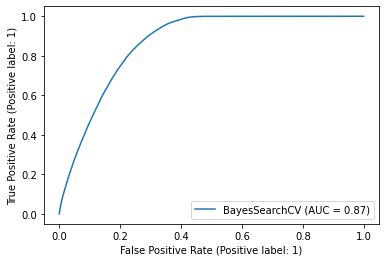

In [244]:
metrics.plot_roc_curve(rf_bayes, Xtrain, ytrain) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


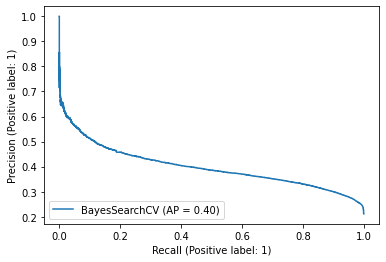

In [246]:
metrics.plot_precision_recall_curve(rf_bayes, Xtrain, ytrain)

#Roc Curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


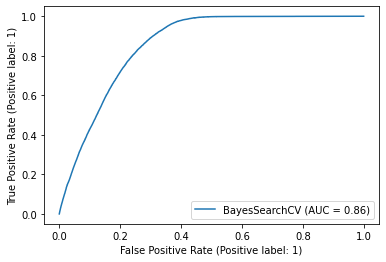

In [247]:
metrics.plot_roc_curve(rf_bayes, Xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


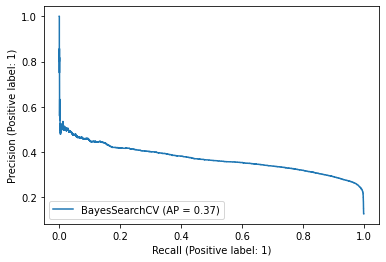

In [248]:
metrics.plot_precision_recall_curve(rf_bayes, Xtest, ytest)

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and Decision tree models performed better than other models.

#Conclusion:



*   Customers of age between 30 to 60 are more likely to buy insurance.

*   Customers with Vehicle_Damage are likely to buy insurance.

*   Customers with Driving License have higher chance of buying Insurance.

*   The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.

*   Comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.


